In this notebook photometric data of a hydroxylation reaction was used in a Linear Regression model to determine the NaOH concentration of an analyte of unkown dilution. Based on the measurement of the reaction kinetics of other dilutions with known NaOH concentration the concentration of the analyte could be deduced.

In [1]:
# import all necessary modules
import pandas as pd
import openpyxl
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# import the data
sample_data_20 = pd.read_excel(r"C:\Users\lionr\OneDrive\Desktop\Hydroxylation\20mM.xlsx")
sample_data_40 = pd.read_excel(r"C:\Users\lionr\OneDrive\Desktop\Hydroxylation\40mM.xlsx")
sample_data_60 = pd.read_excel(r"C:\Users\lionr\OneDrive\Desktop\Hydroxylation\60mM.xlsx")
sample_data_80 = pd.read_excel(r"C:\Users\lionr\OneDrive\Desktop\Hydroxylation\80mM.xlsx")
sample_data_xx = pd.read_excel(r"C:\Users\lionr\OneDrive\Desktop\Hydroxylation\xmM.xlsx")

In [3]:
sample_data_20.head()

,t,E,c,log c
0,0.0,0.914,9.67,0.985
1,0.5,0.874,9.25,0.966
2,1.0,0.832,8.80,0.944
3,1.5,0.795,8.41,0.925
4,2.0,0.759,8.03,0.905


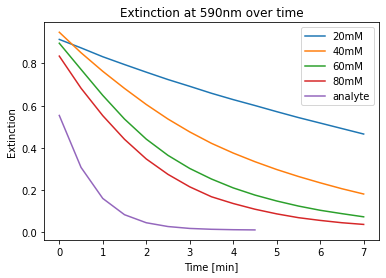

In [4]:
# data visualization
time = sample_data_20["t"]
timex = sample_data_xx["t"]
ext20 = sample_data_20["E"]
ext40 = sample_data_40["E"]
ext60 = sample_data_60["E"]
ext80 = sample_data_80["E"]
extxx = sample_data_xx["E"]
plt.plot(time,ext20)
plt.plot(time,ext40)
plt.plot(time,ext60)
plt.plot(time,ext80)
plt.plot(timex,extxx)
plt.xlabel("Time [min]")
plt.ylabel("Extinction")
plt.title("Extinction at 590nm over time")
plt.legend(["20mM","40mM","60mM","80mM","analyte"])
plt.show()

In [5]:
# calculate and return the rate constant a given data set
def rate_constant(data_set):
    time = np.array(data_set["t"])
    log_c = np.array(data_set["log c"])
    slope = (max(log_c)-min(log_c))
    rate_constant = (2.303 * slope)/max(time)
    return rate_constant

In [6]:
# get the rate constants for all dilutions
rate_constant_20 = rate_constant(sample_data_20)
rate_constant_40 = rate_constant(sample_data_40)
rate_constant_60 = rate_constant(sample_data_60)
rate_constant_80 = rate_constant(sample_data_80)
rate_constant_xx = rate_constant(sample_data_xx)

In [7]:
print(rate_constant_20)
print(rate_constant_40)
print(rate_constant_60)
print(rate_constant_80)
print(rate_constant_xx)

0.09606800000000001
0.234906
0.356307
0.441518
0.8515982222222223


In [8]:
# create 1D arrays for the rate constants and concentrations
rate_constants = np.array([rate_constant_20,rate_constant_40,rate_constant_60,rate_constant_80]).reshape(-1,1)
concentrations = np.array([20,40,60,80]).reshape(-1,1)

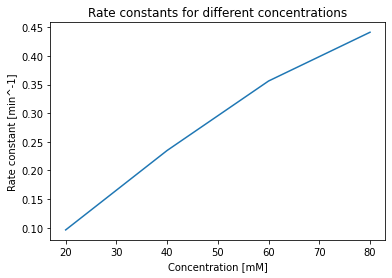

In [9]:
# data visualization to preassess if the data is suitable for linear regression
plt.plot(concentrations,rate_constants)
plt.xlabel("Concentration [mM]")
plt.ylabel("Rate constant [min^-1]")
plt.title("Rate constants for different concentrations")
plt.show()

Linear regression

In [10]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
# fit the model with the data
X = rate_constants
y = concentrations
model.fit(X,y)

LinearRegression()

In [13]:
model.score(X,y)

0.9891293990033911

In [14]:
analyte_conc = model.predict(np.array([rate_constant_xx]).reshape(-1,1))

In [15]:
print(f"NaOH concentration of the analyte with a rate constant of {round(rate_constant_xx,3)} is {round(int(analyte_conc))}mM.")

NaOH concentration of the analyte with a rate constant of 0.852 is 147mM.
